# Secant Method for Root Finding

## 1. Introduction

The **Secant Method** is a root-finding algorithm that uses a succession of secant lines to approximate the root of a function $f(x)$. Unlike Newton's method, which requires the computation of the derivative $f'(x)$, the secant method approximates the derivative using finite differences, making it applicable to functions where derivatives are difficult or expensive to compute.

## 2. Mathematical Foundation

### 2.1 Derivation from Newton's Method

Newton's method for finding roots uses the iteration:

$$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$$

The secant method replaces the derivative $f'(x_n)$ with a finite difference approximation:

$$f'(x_n) \approx \frac{f(x_n) - f(x_{n-1})}{x_n - x_{n-1}}$$

Substituting this approximation yields the **secant method iteration formula**:

$$\boxed{x_{n+1} = x_n - f(x_n) \cdot \frac{x_n - x_{n-1}}{f(x_n) - f(x_{n-1})}}$$

Equivalently, this can be written as:

$$x_{n+1} = \frac{x_{n-1} f(x_n) - x_n f(x_{n-1})}{f(x_n) - f(x_{n-1})}$$

### 2.2 Geometric Interpretation

Geometrically, the secant method constructs a secant line through two points $(x_{n-1}, f(x_{n-1}))$ and $(x_n, f(x_n))$ on the curve $y = f(x)$. The next approximation $x_{n+1}$ is the $x$-intercept of this secant line.

### 2.3 Convergence Analysis

The secant method has **superlinear convergence** with order:

$$p = \frac{1 + \sqrt{5}}{2} = \phi \approx 1.618$$

where $\phi$ is the golden ratio. This means the error satisfies:

$$|e_{n+1}| \approx C |e_n|^\phi$$

for some constant $C$ depending on the function and the root.

### 2.4 Comparison with Other Methods

| Method | Convergence Order | Function Evaluations per Step | Derivative Required |
|--------|------------------|------------------------------|--------------------|
| Bisection | Linear (1.0) | 1 | No |
| Secant | Superlinear (~1.618) | 1 | No |
| Newton | Quadratic (2.0) | 1 + 1 derivative | Yes |

## 3. Implementation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable, Tuple, List

# Set up plotting style
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 11
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

In [2]:
def secant_method(
    f: Callable[[float], float],
    x0: float,
    x1: float,
    tol: float = 1e-10,
    max_iter: int = 100
) -> Tuple[float, List[float], int]:
    """
    Find root of f(x) = 0 using the Secant Method.
    
    Parameters
    ----------
    f : callable
        The function whose root we seek
    x0 : float
        First initial guess
    x1 : float
        Second initial guess
    tol : float
        Tolerance for convergence
    max_iter : int
        Maximum number of iterations
    
    Returns
    -------
    root : float
        Approximation to the root
    history : list
        List of all approximations
    iterations : int
        Number of iterations performed
    """
    history = [x0, x1]
    
    for i in range(max_iter):
        f_x0 = f(x0)
        f_x1 = f(x1)
        
        # Check for division by zero
        if abs(f_x1 - f_x0) < 1e-15:
            print(f"Warning: Division by near-zero at iteration {i}")
            break
        
        # Secant method iteration
        x2 = x1 - f_x1 * (x1 - x0) / (f_x1 - f_x0)
        history.append(x2)
        
        # Check for convergence
        if abs(x2 - x1) < tol:
            return x2, history, i + 1
        
        # Update for next iteration
        x0 = x1
        x1 = x2
    
    print(f"Warning: Maximum iterations ({max_iter}) reached")
    return x1, history, max_iter

## 4. Example Applications

### 4.1 Finding $\sqrt{2}$

To find $\sqrt{2}$, we solve $f(x) = x^2 - 2 = 0$.

In [3]:
# Example 1: Finding sqrt(2)
f1 = lambda x: x**2 - 2

root1, history1, iters1 = secant_method(f1, 1.0, 2.0)

print("Finding √2 using f(x) = x² - 2")
print("=" * 50)
print(f"Root found: {root1:.15f}")
print(f"Actual √2:  {np.sqrt(2):.15f}")
print(f"Error:      {abs(root1 - np.sqrt(2)):.2e}")
print(f"Iterations: {iters1}")
print("\nIteration history:")
for i, x in enumerate(history1):
    print(f"  x_{i} = {x:.15f}")

Finding √2 using f(x) = x² - 2
Root found: 1.414213562373095
Actual √2:  1.414213562373095
Error:      0.00e+00
Iterations: 7

Iteration history:
  x_0 = 1.000000000000000
  x_1 = 2.000000000000000
  x_2 = 1.333333333333333
  x_3 = 1.400000000000000
  x_4 = 1.414634146341463
  x_5 = 1.414211438474870
  x_6 = 1.414213562057320
  x_7 = 1.414213562373095
  x_8 = 1.414213562373095


### 4.2 Transcendental Equation

Find the root of $f(x) = x - \cos(x)$, which cannot be solved analytically.

In [4]:
# Example 2: Transcendental equation
f2 = lambda x: x - np.cos(x)

root2, history2, iters2 = secant_method(f2, 0.0, 1.0)

print("Finding root of f(x) = x - cos(x)")
print("=" * 50)
print(f"Root found: {root2:.15f}")
print(f"f(root):    {f2(root2):.2e}")
print(f"Iterations: {iters2}")
print("\nThis is the Dottie number (fixed point of cosine).")

Finding root of f(x) = x - cos(x)
Root found: 0.739085133215161
f(root):    0.00e+00
Iterations: 6

This is the Dottie number (fixed point of cosine).


### 4.3 Polynomial Root Finding

Find a root of the cubic polynomial $f(x) = x^3 - 2x - 5$.

In [5]:
# Example 3: Cubic polynomial
f3 = lambda x: x**3 - 2*x - 5

root3, history3, iters3 = secant_method(f3, 2.0, 3.0)

print("Finding root of f(x) = x³ - 2x - 5")
print("=" * 50)
print(f"Root found: {root3:.15f}")
print(f"f(root):    {f3(root3):.2e}")
print(f"Iterations: {iters3}")

Finding root of f(x) = x³ - 2x - 5
Root found: 2.094551481542327
f(root):    -8.88e-16
Iterations: 7


## 5. Convergence Analysis

Let's analyze the convergence rate empirically and verify the theoretical order of $\phi \approx 1.618$.

In [6]:
def analyze_convergence(history: List[float], true_root: float) -> Tuple[np.ndarray, float]:
    """
    Analyze the convergence rate of an iterative method.
    
    Returns the errors and estimated convergence order.
    """
    errors = np.abs(np.array(history) - true_root)
    
    # Estimate convergence order using consecutive errors
    # |e_{n+1}| ≈ C|e_n|^p => log|e_{n+1}| ≈ log(C) + p*log|e_n|
    orders = []
    for i in range(1, len(errors) - 1):
        if errors[i] > 1e-14 and errors[i-1] > 1e-14 and errors[i+1] > 1e-14:
            if errors[i] != errors[i-1]:
                p = np.log(errors[i+1] / errors[i]) / np.log(errors[i] / errors[i-1])
                if 0.5 < p < 3:  # Filter out numerical artifacts
                    orders.append(p)
    
    avg_order = np.mean(orders) if orders else np.nan
    return errors, avg_order

# Analyze convergence for sqrt(2) example
errors1, order1 = analyze_convergence(history1, np.sqrt(2))

print("Convergence Analysis for √2")
print("=" * 50)
print(f"Theoretical convergence order: φ ≈ 1.618")
print(f"Estimated convergence order:   {order1:.3f}")
print("\nError progression:")
for i, e in enumerate(errors1):
    if e > 1e-16:
        print(f"  |e_{i}| = {e:.6e}")

Convergence Analysis for √2
Theoretical convergence order: φ ≈ 1.618
Estimated convergence order:   1.518

Error progression:
  |e_0| = 4.142136e-01
  |e_1| = 5.857864e-01
  |e_2| = 8.088023e-02
  |e_3| = 1.421356e-02
  |e_4| = 4.205840e-04
  |e_5| = 2.123898e-06
  |e_6| = 3.157747e-10
  |e_7| = 2.220446e-16


## 6. Visualization

### 6.1 Secant Method Iterations

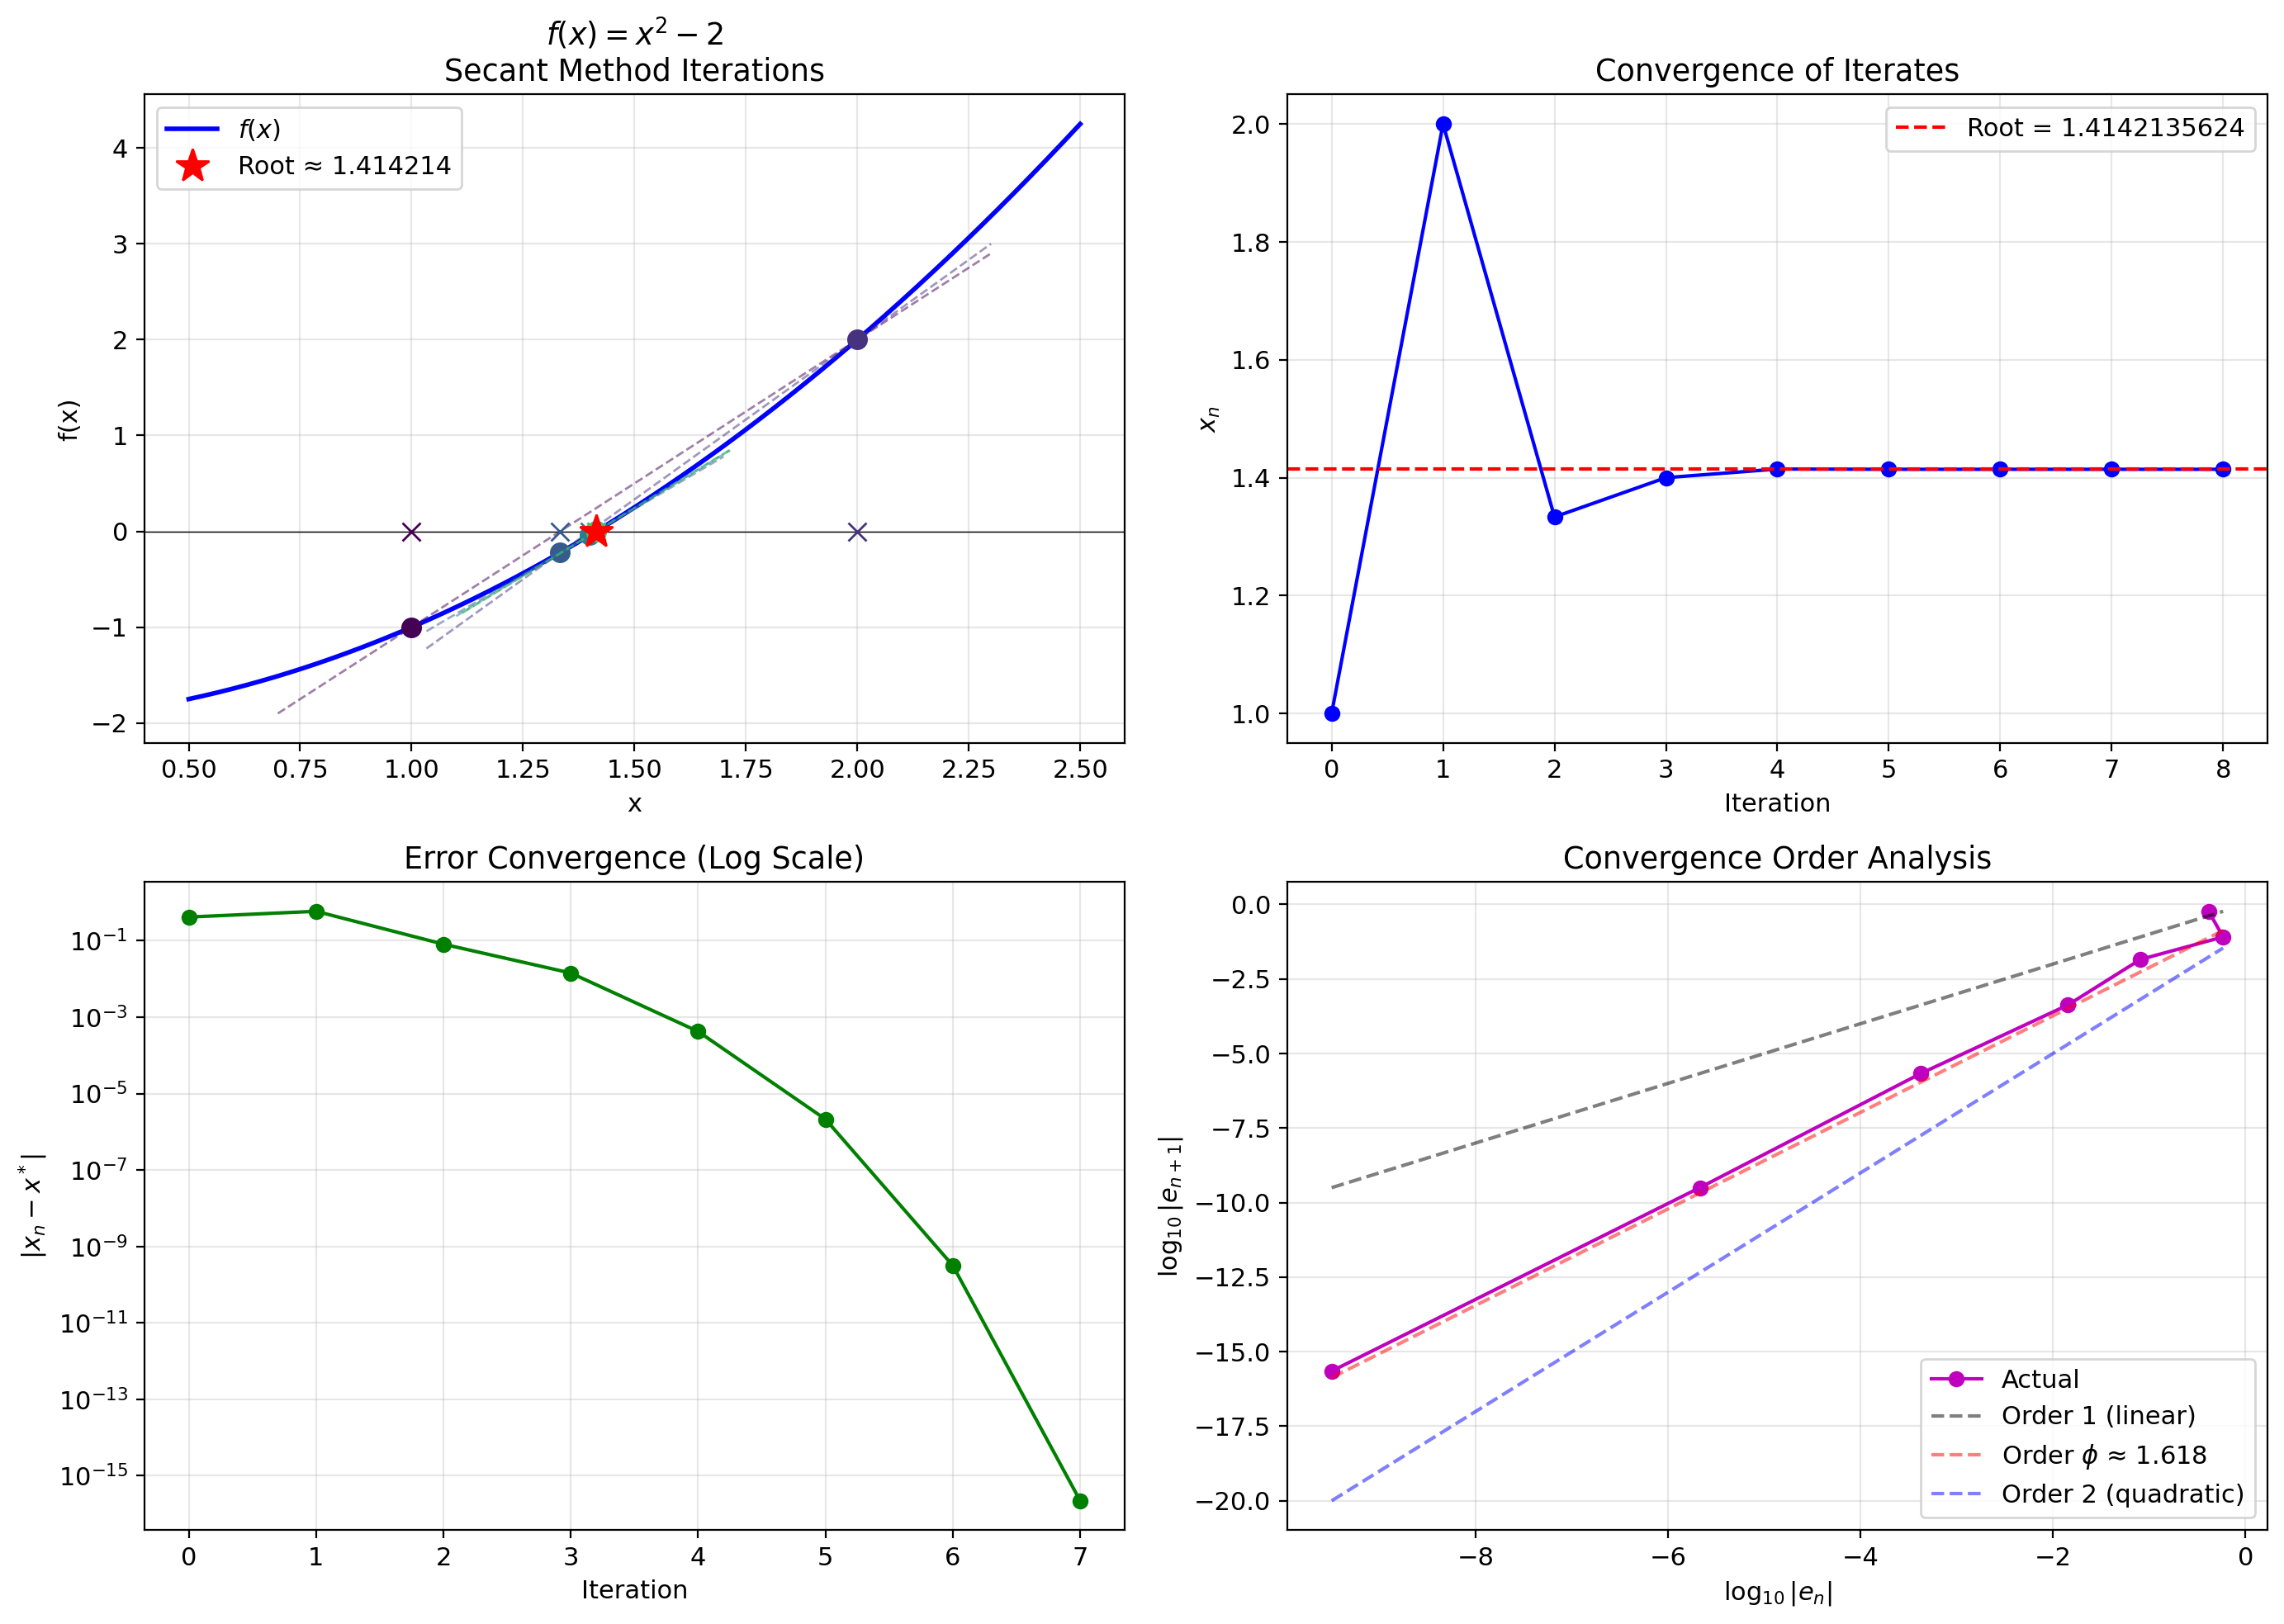


Plot saved to 'plot.png'


In [7]:
def plot_secant_iterations(f, history, title, x_range):
    """
    Visualize the secant method iterations.
    """
    x = np.linspace(x_range[0], x_range[1], 1000)
    y = f(x)
    
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # Plot 1: Function and iterations
    ax1 = axes[0, 0]
    ax1.plot(x, y, 'b-', linewidth=2, label=r'$f(x)$')
    ax1.axhline(y=0, color='k', linewidth=0.5)
    
    # Plot secant lines and points
    colors = plt.cm.viridis(np.linspace(0, 1, len(history)-1))
    for i in range(min(len(history)-1, 6)):  # Show first 6 iterations
        x0, x1 = history[i], history[i+1]
        y0, y1 = f(x0), f(x1)
        
        # Secant line
        if i < len(history) - 2:
            slope = (y1 - y0) / (x1 - x0) if x1 != x0 else 0
            x_line = np.array([min(x0, x1) - 0.3, max(x0, x1) + 0.3])
            y_line = y0 + slope * (x_line - x0)
            ax1.plot(x_line, y_line, '--', color=colors[i], alpha=0.5, linewidth=1)
        
        # Points
        ax1.plot(x0, y0, 'o', color=colors[i], markersize=8)
        ax1.plot(x0, 0, 'x', color=colors[i], markersize=8)
    
    # Mark final root
    ax1.plot(history[-1], 0, 'r*', markersize=15, label=f'Root ≈ {history[-1]:.6f}')
    ax1.set_xlabel('x')
    ax1.set_ylabel('f(x)')
    ax1.set_title(f'{title}\nSecant Method Iterations')
    ax1.legend()
    
    # Plot 2: Convergence of iterates
    ax2 = axes[0, 1]
    iterations = range(len(history))
    ax2.plot(iterations, history, 'bo-', markersize=6)
    ax2.axhline(y=history[-1], color='r', linestyle='--', label=f'Root = {history[-1]:.10f}')
    ax2.set_xlabel('Iteration')
    ax2.set_ylabel(r'$x_n$')
    ax2.set_title('Convergence of Iterates')
    ax2.legend()
    
    # Plot 3: Error vs iteration (log scale)
    ax3 = axes[1, 0]
    errors = np.abs(np.array(history) - history[-1])
    errors_nonzero = errors[errors > 1e-16]
    ax3.semilogy(range(len(errors_nonzero)), errors_nonzero, 'go-', markersize=6)
    ax3.set_xlabel('Iteration')
    ax3.set_ylabel(r'$|x_n - x^*|$')
    ax3.set_title('Error Convergence (Log Scale)')
    
    # Plot 4: Convergence order estimation
    ax4 = axes[1, 1]
    if len(errors_nonzero) > 2:
        log_errors = np.log10(errors_nonzero[:-1])
        log_errors_next = np.log10(errors_nonzero[1:])
        ax4.plot(log_errors, log_errors_next, 'mo-', markersize=6, label='Actual')
        
        # Reference lines
        x_ref = np.linspace(min(log_errors), max(log_errors), 100)
        ax4.plot(x_ref, x_ref, 'k--', alpha=0.5, label='Order 1 (linear)')
        ax4.plot(x_ref, 1.618 * x_ref - 0.5, 'r--', alpha=0.5, label=r'Order $\phi$ ≈ 1.618')
        ax4.plot(x_ref, 2 * x_ref - 1, 'b--', alpha=0.5, label='Order 2 (quadratic)')
        
    ax4.set_xlabel(r'$\log_{10}|e_n|$')
    ax4.set_ylabel(r'$\log_{10}|e_{n+1}|$')
    ax4.set_title('Convergence Order Analysis')
    ax4.legend(loc='lower right')
    
    plt.tight_layout()
    return fig

# Create visualization for sqrt(2) problem
fig = plot_secant_iterations(f1, history1, r'$f(x) = x^2 - 2$', [0.5, 2.5])
plt.savefig('secant_method_root_finding_analysis.png', dpi=150, bbox_inches='tight')
plt.show()
print("\nPlot saved to 'plot.png'")

## 7. Comparison with Newton's Method

Let's compare the secant method with Newton's method to see the trade-off between convergence rate and derivative computation.

In [8]:
def newton_method(
    f: Callable[[float], float],
    df: Callable[[float], float],
    x0: float,
    tol: float = 1e-10,
    max_iter: int = 100
) -> Tuple[float, List[float], int]:
    """
    Find root using Newton's method.
    """
    history = [x0]
    
    for i in range(max_iter):
        f_x = f(x0)
        df_x = df(x0)
        
        if abs(df_x) < 1e-15:
            print(f"Warning: Near-zero derivative at iteration {i}")
            break
        
        x1 = x0 - f_x / df_x
        history.append(x1)
        
        if abs(x1 - x0) < tol:
            return x1, history, i + 1
        
        x0 = x1
    
    return x0, history, max_iter

# Compare methods for f(x) = x^3 - 2x - 5
f = lambda x: x**3 - 2*x - 5
df = lambda x: 3*x**2 - 2

root_secant, hist_secant, iters_secant = secant_method(f, 2.0, 3.0)
root_newton, hist_newton, iters_newton = newton_method(f, df, 2.0)

print("Comparison: Secant vs Newton's Method")
print("=" * 50)
print(f"Function: f(x) = x³ - 2x - 5")
print(f"\nSecant Method:")
print(f"  Root:       {root_secant:.15f}")
print(f"  Iterations: {iters_secant}")
print(f"  Function evaluations: {iters_secant + 1}")
print(f"\nNewton's Method:")
print(f"  Root:       {root_newton:.15f}")
print(f"  Iterations: {iters_newton}")
print(f"  Function + derivative evaluations: {2 * iters_newton}")

Comparison: Secant vs Newton's Method
Function: f(x) = x³ - 2x - 5

Secant Method:
  Root:       2.094551481542327
  Iterations: 7
  Function evaluations: 8

Newton's Method:
  Root:       2.094551481542327
  Iterations: 5
  Function + derivative evaluations: 10


## 8. Practical Considerations

### 8.1 Advantages of the Secant Method

1. **No derivative required**: Useful when $f'(x)$ is difficult to compute or unavailable
2. **Faster than bisection**: Superlinear convergence ($p \approx 1.618$) vs linear ($p = 1$)
3. **Simple implementation**: Only requires function evaluations

### 8.2 Disadvantages

1. **No guaranteed convergence**: May diverge if initial guesses are poor
2. **Two initial guesses required**: Unlike Newton's method which needs only one
3. **Slower than Newton**: Quadratic vs superlinear convergence

### 8.3 When to Use

- When derivatives are expensive or impossible to compute
- When good initial guesses are available
- For well-behaved functions without multiple nearby roots

In [9]:
# Demonstrate potential failure case
def failure_example():
    """Show a case where secant method can struggle."""
    # Function with multiple roots
    f = lambda x: np.sin(x)
    
    # Poor initial guesses spanning multiple roots
    root, history, iters = secant_method(f, 3.0, 3.5, max_iter=50)
    
    print("Potential Issue: Multiple Roots")
    print("=" * 50)
    print(f"Function: f(x) = sin(x)")
    print(f"Initial guesses: x₀ = 3.0, x₁ = 3.5")
    print(f"Root found: {root:.10f}")
    print(f"Nearest multiple of π: {np.round(root/np.pi):.0f}π = {np.round(root/np.pi)*np.pi:.10f}")
    print(f"Iterations: {iters}")

failure_example()

Potential Issue: Multiple Roots
Function: f(x) = sin(x)
Initial guesses: x₀ = 3.0, x₁ = 3.5
Root found: 3.1415926536
Nearest multiple of π: 1π = 3.1415926536
Iterations: 4


## 9. Summary

The secant method is a powerful root-finding algorithm that bridges the gap between the robustness of bisection and the speed of Newton's method. Its key characteristics are:

- **Iteration formula**: $x_{n+1} = x_n - f(x_n) \cdot \frac{x_n - x_{n-1}}{f(x_n) - f(x_{n-1})}$
- **Convergence order**: $\phi = \frac{1 + \sqrt{5}}{2} \approx 1.618$ (superlinear)
- **Requirements**: Two initial guesses, function evaluations only
- **Best use case**: When derivatives are unavailable but good initial estimates exist

The method represents an elegant balance between computational efficiency and practical applicability in numerical root-finding problems.